In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tfc
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Generating random linear data
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)

In [16]:
# Adding noise to the random linear data
x += np.random.uniform(-5, 5, 100)
y += np.random.uniform(-5, 5, 100)

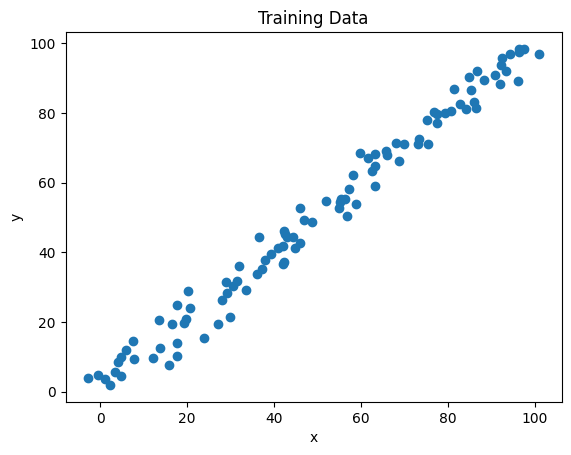

In [17]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()

In [18]:
X = tfc.placeholder("float")
Y = tfc.placeholder("float")
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

In [19]:
learning_rate = 0.01
training_epochs = 1000

In [20]:
# Hypothesis
y_pred = tf.add(tf.multiply(X, W), b)
 
# MSE cost function
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * len(x))
 
# Gradient Descent Optimizer
optimizer_gradient = tfc.train.GradientDescentOptimizer(learning_rate).minimize(cost)
 
# Global variables
init = tfc.global_variables_initializer()

In [21]:
# Starting the Tensorflow Session
with tfc.Session() as sess:
     
    # Initializing the Variables
    sess.run(init)
     
    # Iterating through all the epochs
    for epoch in range(training_epochs):
         
        # Feeding each data point into the optimizer using Feed Dictionary
        for (_x, _y) in zip(x, y):
            sess.run(optimizer_gradient, feed_dict = {X : _x, Y : _y})
         
        # Displaying the result after every 50 epochs
        if (epoch + 1) % 50 == 0:
            # Calculating the cost a every epoch
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
     
    # Storing necessary values to be used outside the Session
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)


Epoch 50 : cost = 8.042168 W = 1.0002687 b = 0.967755
Epoch 100 : cost = 8.055509 W = 0.9990441 b = 1.0858922
Epoch 150 : cost = 8.071811 W = 0.9979137 b = 1.194929
Epoch 200 : cost = 8.090262 W = 0.9968704 b = 1.2955705
Epoch 250 : cost = 8.110198 W = 0.99590737 b = 1.3884714
Epoch 300 : cost = 8.131059 W = 0.99501854 b = 1.4742069
Epoch 350 : cost = 8.152424 W = 0.99419814 b = 1.5533452
Epoch 400 : cost = 8.173933 W = 0.993441 b = 1.626382
Epoch 450 : cost = 8.195314 W = 0.9927421 b = 1.693797
Epoch 500 : cost = 8.216353 W = 0.992097 b = 1.7560285
Epoch 550 : cost = 8.2368765 W = 0.99150145 b = 1.8134687
Epoch 600 : cost = 8.256768 W = 0.9909519 b = 1.8664864
Epoch 650 : cost = 8.275928 W = 0.99044466 b = 1.9154131
Epoch 700 : cost = 8.294297 W = 0.9899765 b = 1.9605699
Epoch 750 : cost = 8.311838 W = 0.9895444 b = 2.0022552
Epoch 800 : cost = 8.328528 W = 0.98914546 b = 2.0407374
Epoch 850 : cost = 8.344362 W = 0.9887771 b = 2.0762694
Epoch 900 : cost = 8.359332 W = 0.98843724 b = 2

In [22]:
predictions = weight * x + bias
print("Training cost =", 
      training_cost, 
      "Weight =", weight, 
      "bias =", bias, '\n')

Training cost = 8.386736 Weight = 0.98783445 bias = 2.167196 



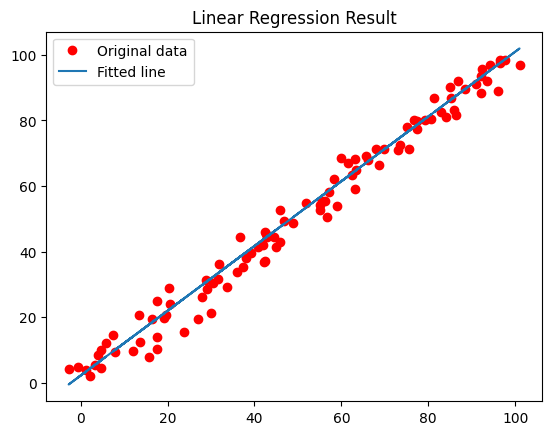

In [23]:
plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()